In [408]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import datetime

In [409]:
file_dir = 'C://Users/KyleKato/OneDrive/ut_bootcamp/Portfolio/Project/data/'
df = pd.read_csv(f'{file_dir}chinese_debt_trap_world.csv')
df.head(2)


,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil


In [410]:
df = df.rename(columns={'Expand All | Collapse All':'NAME'})
df['Country'] = df['Country'].str.replace('Congo, Democratic Republic of the', 'Congo, Republic of the')
df[['before','after']] = df.AMOUNT.str.split('.', expand=True)
df['after'] = df['after'].replace(np.nan, '')
df.head(2)

,NAME,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,before,after
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola,$50M,
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,$7,0B


In [411]:
df['before'] = df['before'].str.replace('B', '000000').str.replace('M', '000').str.replace('$', '')
df['after'] = df['after'].str.replace('B', '00000').str.replace('M', '00')
df.head(2)

C:\Users\KyleKato\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,NAME,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,before,after
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola,50000,
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,7,000000


In [412]:
df['AMT'] = df['before'] + df['after']
df.drop(['before', 'after', 'AMOUNT'], axis=1, inplace=True)
df.head(2)

,NAME,YEAR,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,AMT
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,CDB,Government,Transport,None Known,Angola,50000
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,7000000


In [413]:
df['AMT'] = df['AMT'].astype(int)
df['BORROWER'] = df['BORROWER'].astype(str)
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
df.dtypes

NAME                                   object
YEAR                           datetime64[ns]
LENDER                                 object
BORROWER                               object
SECTOR                                 object
SENSITIVE TERRITORY OVERLAP            object
Country                                object
AMT                                     int32
dtype: object

In [414]:
# Grouping by Country and summing them up
country_group = df.groupby(['Country']).sum()['AMT']

# Created a new dataframe for the grouped countries
country_df = pd.DataFrame({
                    'Amount': country_group
})

# Include country if it has more than 1,000,000 M
country_df = country_df[country_df['Amount'] > 1000000]
country_df.head(5)

,Amount
Country,
Angola,29640000
Argentina,17083000
Bangladesh,11089000
Belarus,6440000
Bolivia,3439000


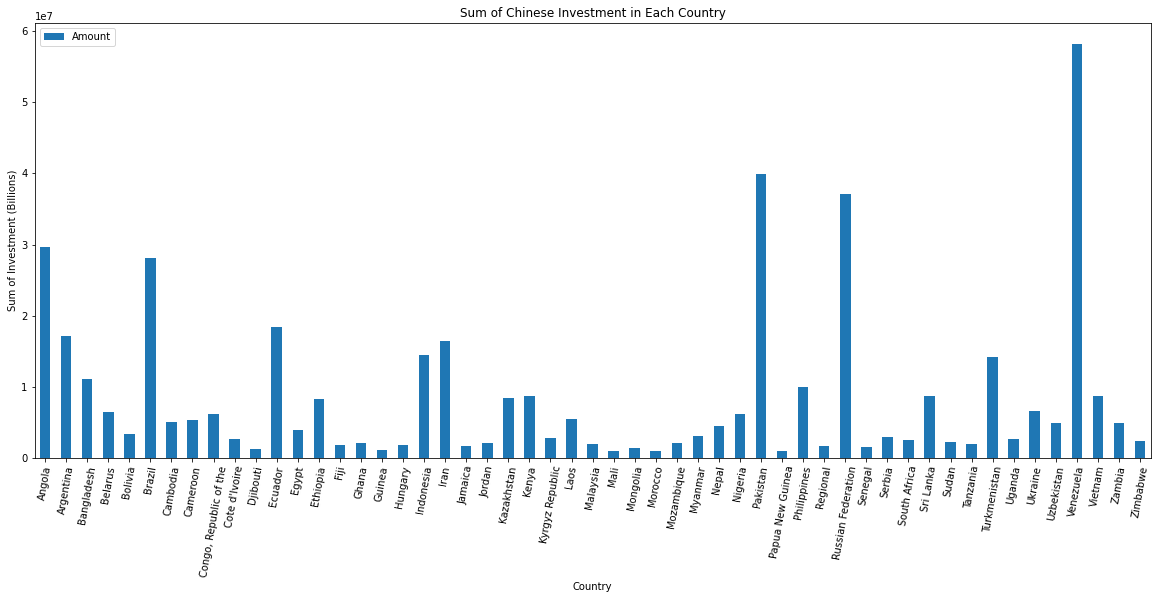

In [415]:
# Plotting the graph
country_df.plot(kind='bar', figsize=(20,8))
plt.title('Sum of Chinese Investment in Each Country')
plt.xlabel('Country')
plt.ylabel('Sum of Investment (Billions)')
plt.xticks(rotation=80)
plt.show()

In [416]:
df.head()

,NAME,YEAR,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,AMT
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011-01-01,CDB,Government,Transport,None Known,Angola,50000
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009-01-01,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,7000000
2,1000 housing project,2012-01-01,ExImBank,Government,Government,None Known,Suriname,47000
3,115kV Transmission Line and Substation from Ph...,2009-01-01,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia,475000
4,151 Multisector infrastructure projects,2016-01-01,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,600000


In [421]:
venezula = df[['Country'] = 'Venezuela']

SyntaxError: invalid syntax (3349172585.py, line 1)

In [419]:
plt.line(annual_amt)

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'